In [1]:
# making plots like in Nischal's thesis
# based on MAGPHYS data from GAMA survey for comparison galaxies
# based on CIGALE fits for quasars
# comparison galaxies from Stone+2023, 200 sets of 205 comparison galaxies

In [2]:
import numpy as np
from astropy import units as u
from astropy.table import Table, join

# for plotting
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
%matplotlib inline

In [3]:
from matplotlib.colors import LogNorm


In [4]:
%cd /Volumes/Gyumri_HD/ARCHIVE/phd/17PhDResearch/GAMA_hosts/1_tables
%ls

/Volumes/Gyumri_HD/ARCHIVE/phd/17PhDResearch/GAMA_hosts/1_tables
10_main_table_gal_199_new.fits                6_quasar_hosts_cigale_input_i01.fits
12_data_seed_gals_set199_magphys.fits         7_LambdarCat.fits
13_data_seed_gals_set199_phot.fits            7_quasar_hosts_cigale_input_i01.cat
17_data_seed_gals_set199_cigale_catalog.cat   7_quasar_hosts_cigale_input_i01.fits
17_data_seed_gals_set199_cigale_catalog.fits  all_seedgalaxies_w_stellarmassGAMA.fits
1_data_quasar_hosts.fits                      figure_histogram_sSFR.pdf
1_data_seed_gals.fits                         figure_sfr17_comparison_plot.pdf
1_main_table_all_quasars_submitted.fits       figure_sfr17_comparison_plot_gals_ave.pdf
2_data_quasar_hosts_magphys.fits              figure_sfr18_comparison_plot.pdf
2_data_seed_gals_magphys.fits                 figure_sfr18_comparison_plot_gals_ave.pdf
3_data_quasar_hosts_magphys_phot.fits         results1.fits
3_data_seed_gals_magphys_phot.fits            results2.fits
4_quasar_ho

In [5]:
# open the CIGALE result tables and concatenate them into one big table

In [6]:
#data_quasars = Table.read('2_data_quasar_hosts_magphys.fits')
data_gals = Table.read('2_data_seed_gals_magphys.fits')
data_quasars = Table.read('results_withAGN.fits')

In [7]:
data_quasars.info()

<Table length=205>
                 name                  dtype      unit    
------------------------------------- ------- ------------
                                   id   int64             
                   bayes.sfh.age_main float64          Myr
               bayes.sfh.age_main_err float64          Myr
                        bayes.sfh.sfr float64 solMass / yr
                    bayes.sfh.sfr_err float64 solMass / yr
                 bayes.sfh.sfr100Myrs float64 solMass / yr
             bayes.sfh.sfr100Myrs_err float64 solMass / yr
                  bayes.sfh.sfr10Myrs float64 solMass / yr
              bayes.sfh.sfr10Myrs_err float64 solMass / yr
                 bayes.stellar.m_star float64      solMass
             bayes.stellar.m_star_err float64      solMass
                      best.chi_square float64             
              best.reduced_chi_square float64             
                         best.agn.EBV float64          mag
                         best.agn.Mcl

In [8]:
data_quasars[:4]

id,bayes.sfh.age_main,bayes.sfh.age_main_err,bayes.sfh.sfr,bayes.sfh.sfr_err,bayes.sfh.sfr100Myrs,bayes.sfh.sfr100Myrs_err,bayes.sfh.sfr10Myrs,bayes.sfh.sfr10Myrs_err,bayes.stellar.m_star,bayes.stellar.m_star_err,best.chi_square,best.reduced_chi_square,best.agn.EBV,best.agn.Mcl,best.agn.R,best.agn.delta,best.agn.disk_type,best.agn.emissivity,best.agn.fracAGN,best.agn.fracAGN_dale2014,best.agn.i,best.agn.law,best.agn.oa,best.agn.pl,best.agn.q,best.agn.t,best.agn.temperature,best.attenuation.E_BV_factor,best.attenuation.E_BV_lines,best.attenuation.E_BVs,best.attenuation.FUV,best.attenuation.powerlaw_slope,best.attenuation.uv_bump_amplitude,best.attenuation.uv_bump_wavelength,best.attenuation.uv_bump_width,best.dust.alpha,best.sfh.age,best.sfh.age_burst,best.sfh.age_main,best.sfh.f_burst,best.sfh.tau_burst,best.sfh.tau_main,best.stellar.age_m_star,best.stellar.imf,best.stellar.metallicity,best.stellar.old_young_separation_age,best.universe.age,best.universe.luminosity_distance,best.universe.redshift,best.agn.L_6um,best.agn.accretion_power,best.agn.disk_luminosity,best.agn.intrin_Lnu_2500A_30deg,best.agn.luminosity,best.agn.polar_dust_luminosity,best.agn.torus_dust_luminosity,best.agn.total_dust_luminosity,best.dust.luminosity,best.sfh.integrated,best.sfh.sfr,best.sfh.sfr100Myrs,best.sfh.sfr10Myrs,best.stellar.lum,best.stellar.lum_ly,best.stellar.lum_ly_old,best.stellar.lum_ly_young,best.stellar.lum_old,best.stellar.lum_young,best.stellar.m_gas,best.stellar.m_gas_old,best.stellar.m_gas_young,best.stellar.m_star,best.stellar.m_star_old,best.stellar.m_star_young,best.stellar.n_ly,best.stellar.n_ly_old,best.stellar.n_ly_young,best.FUV,best.NUV,best.u_prime,best.g_prime,best.r_prime,best.i_prime,best.z_prime,best.Paranal_VISTA_Z_filter,best.Paranal_VISTA_Y_filter,best.Paranal_VISTA_J_filter,best.Paranal_VISTA_H_filter,best.Paranal_VISTA_Ks_filter,best.WISE1,best.WISE2,best.WISE3,best.WISE4,best.PACS_green,best.PACS_red,best.PSW_ext,best.PMW_ext,best.PLW_ext
,Myr,Myr,solMass / yr,solMass / yr,solMass / yr,solMass / yr,solMass / yr,solMass / yr,solMass,solMass,,,mag,,,,,,,,deg,,deg,,,,K,,mag,mag,mag,,,nm,nm,,Myr,Myr,Myr,,Myr,Myr,Myr,,,Myr,Myr,m,,W,W,W,W / Hz,W,W,W,W,W,solMass,solMass / yr,solMass / yr,solMass / yr,W,W,W,W,W,W,solMass,solMass,solMass,solMass,solMass,solMass,ph / s,ph / s,ph / s,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
7454,9894.75636479531,342.60777113051154,5.331825746387423,0.26659128731937115,5.393700673338167,0.2696850336669084,5.337413320780878,0.2668706660390439,60130460511.729195,3379666501.620734,29.988924644188906,1.4994462322094453,0.0,0.97,20.0,-1.0,1.0,1.6,0.0,0.0,30.0,0.0,40.0,1.0,1.0,7.0,100.0,0.44,0.3,0.132,1.4202318360299646,-0.2,0.0,217.5,35.0,2.0,10000.0,50.0,10000.0,0.0,50.0,3000.0,5277.322386876216,1.0,0.02,10.0,11990.79762868111,2.0290045158197307e+25,0.1395999938249588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.699843429459339e+37,112081783519.49965,5.256383034970249,5.317475923678347,5.2619053297948835,4.820927174493465e+37,2.5914544449126647e+36,6.130087769026526e+34,2.530153567222399e+36,3.518392706517202e+37,1.3025344679762633e+37,51315797968.02081,51312676921.29635,3121046.724460314,607

In [9]:
data_gals.info()

<Table length=41000>
         name          dtype      unit        class    
--------------------- ------- ------------ ------------
               CATAID   int64              MaskedColumn
                   RA float64          deg       Column
                  DEC float64          deg       Column
                    Z float32                    Column
mass_stellar_best_fit float32      solMass       Column
   mass_dust_best_fit float32      solMass       Column
  SFR_0_1Gyr_best_fit float32 solMass / yr       Column
 sSFR_0_1Gyr_best_fit float32       1 / yr       Column
   tform_percentile50 float32           yr       Column
    fb17_percentile50 float32                    Column
    fb18_percentile50 float32                    Column
    fb19_percentile50 float32                    Column
    fb29_percentile50 float32                    Column
   sfr17_percentile50 float32 solMass / yr       Column
   sfr18_percentile50 float32 solMass / yr       Column
   sfr19_percentile50 float

In [10]:
# plotting the specific star formation rate (sSFR) and stellar mass

# first get the data
ssfr_quasars = data_quasars['bayes.sfh.sfr']/data_quasars['bayes.stellar.m_star']
ssfr_gals = data_gals['sSFR_0_1Gyr_best_fit']

In [11]:
# getting the log10 values
ssfr_quasars_log = np.log10(ssfr_quasars)
ssfr_gals_log = np.log10(ssfr_gals)

In [12]:
np.info(ssfr_quasars_log)

class:  Column
shape:  (205,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x7fce490ee600
byteorder:  little
byteswap:  False
type: float64


In [13]:
# compute max and min
print(np.min(ssfr_gals_log))
print(np.max(ssfr_gals_log))

-14.381116
-7.971429


In [14]:
print(np.min(ssfr_quasars_log))
print(np.max(ssfr_quasars_log))

-11.97195386430542
-8.46022564602659


In [32]:
# define bins for the histogram

bins_low = -15
bins_high = -7
nbins = 16

In [33]:
# get the binEdges and the bin width for the histogram
counts_galaxies_all, binEdges_all = np.histogram\
    (ssfr_gals_log, bins=nbins, range=(bins_low,bins_high))

bincenters_all = 0.5*(binEdges_all[1:]+binEdges_all[:-1])

bin_width_all = (binEdges_all[1]-binEdges_all[0])

fraction_galaxies_all = counts_galaxies_all/len(ssfr_gals_log)

count_errors = np.sqrt(counts_galaxies_all)/len(ssfr_gals_log) # Poisson error


In [34]:
binEdges_all

array([-15. , -14.5, -14. , -13.5, -13. , -12.5, -12. , -11.5, -11. ,
       -10.5, -10. ,  -9.5,  -9. ,  -8.5,  -8. ,  -7.5,  -7. ],
      dtype=float32)

In [35]:
# for quasars
counts_quasars_all, binEdges_quasars_all = np.histogram\
    (ssfr_quasars_log, bins=nbins, range=(bins_low,bins_high))

fraction_quasars_all = counts_quasars_all / len(ssfr_quasars_log)# / bin_width

counts_errors_quasars = np.sqrt(counts_quasars_all)/len(ssfr_quasars_log) # Poisson error


In [36]:
# separate galaxies into Star Forming Galaxies (SFGs) and passive galaxies.
cutoff = -10.8 #SSFR cutoff between star-forming and passive galaxies
# taking from the GAMA paper work, Stone+2023

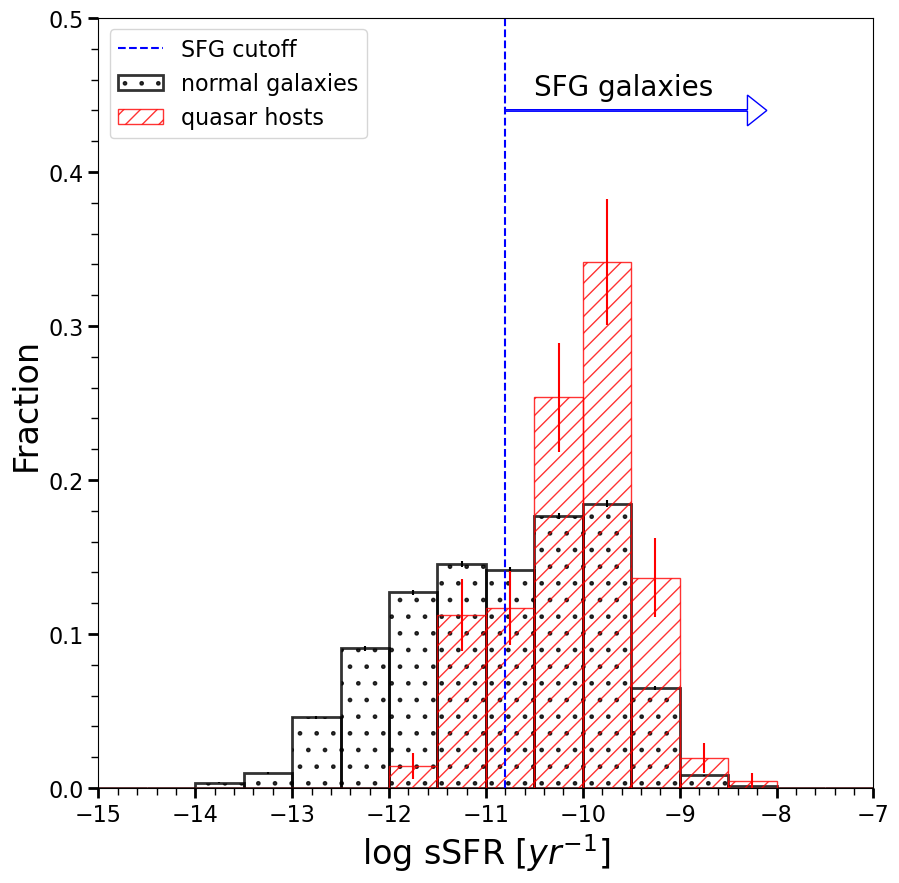

In [38]:
plt.figure(figsize=(10,10))

plt.bar(bincenters_all, fraction_galaxies_all, yerr=count_errors, width=bin_width_all,\
                 color='None', ecolor='k', hatch='.', alpha=0.8, edgecolor='k', \
        linewidth=2, label='normal galaxies')

plt.bar(bincenters_all, fraction_quasars_all, yerr=counts_errors_quasars, width=bin_width_all, \
                 color = 'None', ecolor='red', hatch='//', alpha=0.8, edgecolor='red', \
        linewidth=1, label='quasar hosts')

plt.plot([-10.8,-10.8],[0,0.5], 'b--', label='SFG cutoff')
plt.text(-10.5,0.45, 'SFG galaxies', fontsize=20)
plt.arrow(-10.8, 0.44, 2.5,0, head_length=0.2, head_width=0.02, ec='blue', fc='None')

plt.ylabel('Fraction', fontsize=24)
plt.xlabel('log sSFR [$yr^{-1}$]',fontsize=24)

plt.legend(fontsize=16, loc='upper left')

plt.ylim(0,0.5)
plt.xlim(-15,-7)

plt.locator_params(axis='x', nbins=10)
plt.locator_params(axis='y', nbins=5)

plt.minorticks_on()
plt.tick_params(axis='both',length=7,width=2,labelsize=16)
plt.tick_params(axis='both',which='minor',length=5,width=1)

plt.savefig("figure_histogram_sSFR.pdf")

In [40]:
# getting the average fraction from 200 realizations of normal  galaxies

In [41]:
%pwd

'/Volumes/Gyumri_HD/ARCHIVE/phd/17PhDResearch/GAMA_hosts/1_tables'

In [42]:
%cd ../../GAMA/6_tables/

/Volumes/Gyumri_HD/ARCHIVE/phd/17PhDResearch/GAMA/6_tables


In [43]:
%ls

10_main_table_gal_0_new.fits
10_main_table_gal_0_new_neighbors.fits
10_main_table_gal_0_new_neighbors_SFR.fits
10_main_table_gal_1.fits
10_main_table_gal_10.fits
10_main_table_gal_100.fits
10_main_table_gal_100_new.fits
10_main_table_gal_100_new_neighbors.fits
10_main_table_gal_100_new_neighbors_SFR.fits
10_main_table_gal_101.fits
10_main_table_gal_101_new.fits
10_main_table_gal_101_new_neighbors.fits
10_main_table_gal_101_new_neighbors_SFR.fits
10_main_table_gal_102.fits
10_main_table_gal_102_new.fits
10_main_table_gal_102_new_neighbors.fits
10_main_table_gal_102_new_neighbors_SFR.fits
10_main_table_gal_103.fits
10_main_table_gal_103_new.fits
10_main_table_gal_103_new_neighbors.fits
10_main_table_gal_103_new_neighbors_SFR.fits
10_main_table_gal_104.fits
10_main_table_gal_104_new.fits
10_main_table_gal_104_new_neighbors.fits
10_main_table_gal_104_new_neighbors_SFR.fits
10_main_table_gal_105.fits
10_main_table_gal_105_new.fits
10_main_table_gal_105_new_neighbors.fits
10_main_table_gal_1

15_set130_gal623446neighbors.fits
15_set130_gal62409neighbors.fits
15_set130_gal63220neighbors.fits
15_set130_gal64358neighbors.fits
15_set130_gal64367neighbors.fits
15_set130_gal69751neighbors.fits
15_set130_gal69800neighbors.fits
15_set130_gal70250neighbors.fits
15_set130_gal7338neighbors.fits
15_set130_gal77088neighbors.fits
15_set130_gal78298neighbors.fits
15_set130_gal79032neighbors.fits
15_set130_gal79387neighbors.fits
15_set130_gal79830neighbors.fits
15_set130_gal831509neighbors.fits
15_set130_gal84049neighbors.fits
15_set130_gal84817neighbors.fits
15_set130_gal8674neighbors.fits
15_set130_gal91797neighbors.fits
15_set130_gal918093neighbors.fits
15_set130_gal93906neighbors.fits
15_set130_gal98227neighbors.fits
15_set130_gal98943neighbors.fits
15_set130_gal99568neighbors.fits
15_set130_gal99608neighbors.fits
15_set131_gal106670neighbors.fits
15_set131_gal107018neighbors.fits
15_set131_gal136625neighbors.fits
15_set131_gal137091neighbors.fits
15_set131_gal137888neighbors.fits
15_s

15_set187_gal39075neighbors.fits
15_set187_gal396883neighbors.fits
15_set187_gal402308neighbors.fits
15_set187_gal417535neighbors.fits
15_set187_gal417604neighbors.fits
15_set187_gal417625neighbors.fits
15_set187_gal419001neighbors.fits
15_set187_gal419584neighbors.fits
15_set187_gal423617neighbors.fits
15_set187_gal425660neighbors.fits
15_set187_gal463205neighbors.fits
15_set187_gal463312neighbors.fits
15_set187_gal463440neighbors.fits
15_set187_gal463490neighbors.fits
15_set187_gal47795neighbors.fits
15_set187_gal47802neighbors.fits
15_set187_gal47880neighbors.fits
15_set187_gal48110neighbors.fits
15_set187_gal486347neighbors.fits
15_set187_gal486879neighbors.fits
15_set187_gal48876neighbors.fits
15_set187_gal48900neighbors.fits
15_set187_gal491605neighbors.fits
15_set187_gal491616neighbors.fits
15_set187_gal492387neighbors.fits
15_set187_gal493426neighbors.fits
15_set187_gal493848neighbors.fits
15_set187_gal49634neighbors.fits
15_set187_gal497144neighbors.fits
15_set187_gal505501nei

15_set40_gal48208neighbors.fits
15_set40_gal486785neighbors.fits
15_set40_gal492036neighbors.fits
15_set40_gal492350neighbors.fits
15_set40_gal493005neighbors.fits
15_set40_gal507863neighbors.fits
15_set40_gal508809neighbors.fits
15_set40_gal508980neighbors.fits
15_set40_gal509089neighbors.fits
15_set40_gal513262neighbors.fits
15_set40_gal517674neighbors.fits
15_set40_gal518263neighbors.fits
15_set40_gal519012neighbors.fits
15_set40_gal536275neighbors.fits
15_set40_gal537191neighbors.fits
15_set40_gal53761neighbors.fits
15_set40_gal53802neighbors.fits
15_set40_gal544369neighbors.fits
15_set40_gal544925neighbors.fits
15_set40_gal54679neighbors.fits
15_set40_gal54791neighbors.fits
15_set40_gal548952neighbors.fits
15_set40_gal550786neighbors.fits
15_set40_gal551337neighbors.fits
15_set40_gal551417neighbors.fits
15_set40_gal551499neighbors.fits
15_set40_gal55169neighbors.fits
15_set40_gal55652neighbors.fits
15_set40_gal559043neighbors.fits
15_set40_gal559905neighbors.fits
15_set40_gal56010

15_set92_gal204649neighbors.fits
15_set92_gal208573neighbors.fits
15_set92_gal209578neighbors.fits
15_set92_gal210538neighbors.fits
15_set92_gal210664neighbors.fits
15_set92_gal214986neighbors.fits
15_set92_gal215614neighbors.fits
15_set92_gal216243neighbors.fits
15_set92_gal21868neighbors.fits
15_set92_gal219737neighbors.fits
15_set92_gal22268neighbors.fits
15_set92_gal22296neighbors.fits
15_set92_gal22723neighbors.fits
15_set92_gal227251neighbors.fits
15_set92_gal228529neighbors.fits
15_set92_gal228532neighbors.fits
15_set92_gal230531neighbors.fits
15_set92_gal239402neighbors.fits
15_set92_gal239871neighbors.fits
15_set92_gal240361neighbors.fits
15_set92_gal250536neighbors.fits
15_set92_gal271553neighbors.fits
15_set92_gal272301neighbors.fits
15_set92_gal272946neighbors.fits
15_set92_gal273503neighbors.fits
15_set92_gal278783neighbors.fits
15_set92_gal279053neighbors.fits
15_set92_gal279083neighbors.fits
15_set92_gal280036neighbors.fits
15_set92_gal288771neighbors.fits
15_set92_gal28

17_set112_gal378105neighbors_SFR_seedgal.fits
17_set112_gal383342neighbors_SFR.fits
17_set112_gal383342neighbors_SFR_seedgal.fits
17_set112_gal38948neighbors_SFR.fits
17_set112_gal38948neighbors_SFR_seedgal.fits
17_set112_gal39560neighbors_SFR.fits
17_set112_gal39560neighbors_SFR_seedgal.fits
17_set112_gal40949neighbors_SFR.fits
17_set112_gal40949neighbors_SFR_seedgal.fits
17_set112_gal418119neighbors_SFR.fits
17_set112_gal418119neighbors_SFR_seedgal.fits
17_set112_gal423763neighbors_SFR.fits
17_set112_gal423763neighbors_SFR_seedgal.fits
17_set112_gal486720neighbors_SFR.fits
17_set112_gal486720neighbors_SFR_seedgal.fits
17_set112_gal486893neighbors_SFR.fits
17_set112_gal486893neighbors_SFR_seedgal.fits
17_set112_gal492217neighbors_SFR.fits
17_set112_gal492217neighbors_SFR_seedgal.fits
17_set112_gal493147neighbors_SFR.fits
17_set112_gal493147neighbors_SFR_seedgal.fits
17_set112_gal49400neighbors_SFR.fits
17_set112_gal49400neighbors_SFR_seedgal.fits
17_set112_gal505395neighbors_SFR.fits


17_set16_gal491709neighbors_SFR_seedgal.fits
17_set16_gal491811neighbors_SFR.fits
17_set16_gal491811neighbors_SFR_seedgal.fits
17_set16_gal49310neighbors_SFR.fits
17_set16_gal49310neighbors_SFR_seedgal.fits
17_set16_gal521792neighbors_SFR.fits
17_set16_gal521792neighbors_SFR_seedgal.fits
17_set16_gal549363neighbors_SFR.fits
17_set16_gal549363neighbors_SFR_seedgal.fits
17_set16_gal567851neighbors_SFR.fits
17_set16_gal567851neighbors_SFR_seedgal.fits
17_set16_gal586620neighbors_SFR.fits
17_set16_gal586620neighbors_SFR_seedgal.fits
17_set16_gal599522neighbors_SFR.fits
17_set16_gal599522neighbors_SFR_seedgal.fits
17_set16_gal611563neighbors_SFR.fits
17_set16_gal611563neighbors_SFR_seedgal.fits
17_set16_gal617614neighbors_SFR.fits
17_set16_gal617614neighbors_SFR_seedgal.fits
17_set16_gal619358neighbors_SFR.fits
17_set16_gal619358neighbors_SFR_seedgal.fits
17_set16_gal62363neighbors_SFR.fits
17_set16_gal62363neighbors_SFR_seedgal.fits
17_set16_gal64957neighbors_SFR.fits
17_set16_gal64957neig

17_set46_gal346791neighbors_SFR_seedgal.fits
17_set46_gal371321neighbors_SFR.fits
17_set46_gal371321neighbors_SFR_seedgal.fits
17_set46_gal371624neighbors_SFR.fits
17_set46_gal371624neighbors_SFR_seedgal.fits
17_set46_gal372936neighbors_SFR.fits
17_set46_gal372936neighbors_SFR_seedgal.fits
17_set46_gal381233neighbors_SFR.fits
17_set46_gal381233neighbors_SFR_seedgal.fits
17_set46_gal381832neighbors_SFR.fits
17_set46_gal381832neighbors_SFR_seedgal.fits
17_set46_gal381867neighbors_SFR.fits
17_set46_gal381867neighbors_SFR_seedgal.fits
17_set46_gal386234neighbors_SFR.fits
17_set46_gal386234neighbors_SFR_seedgal.fits
17_set46_gal386732neighbors_SFR.fits
17_set46_gal386732neighbors_SFR_seedgal.fits
17_set46_gal387422neighbors_SFR.fits
17_set46_gal387422neighbors_SFR_seedgal.fits
17_set46_gal423074neighbors_SFR.fits
17_set46_gal423074neighbors_SFR_seedgal.fits
17_set46_gal48081neighbors_SFR.fits
17_set46_gal48081neighbors_SFR_seedgal.fits
17_set46_gal486318neighbors_SFR.fits
17_set46_gal486318

7_G09quasar623320neighbors_massstellar.fits
7_G09quasar623320neighbors_metallicity.fits
7_G09quasar721180neighbors_SFR.fits
7_G09quasar721180neighbors_SFR_QSOhost.fits
7_G09quasar721180neighbors_age.fits
7_G09quasar721180neighbors_massstellar.fits
7_G09quasar721180neighbors_metallicity.fits
7_G09quasar729886neighbors_SFR.fits
7_G09quasar729886neighbors_SFR_QSOhost.fits
7_G09quasar729886neighbors_age.fits
7_G09quasar729886neighbors_massstellar.fits
7_G09quasar729886neighbors_metallicity.fits
7_G09quasar743963neighbors_SFR.fits
7_G09quasar743963neighbors_SFR_QSOhost.fits
7_G09quasar743963neighbors_age.fits
7_G09quasar743963neighbors_massstellar.fits
7_G09quasar743963neighbors_metallicity.fits
7_G09quasar744010neighbors_SFR.fits
7_G09quasar744010neighbors_SFR_QSOhost.fits
7_G09quasar744010neighbors_age.fits
7_G09quasar744010neighbors_massstellar.fits
7_G09quasar744010neighbors_metallicity.fits
7_G12quasar138906neighbors_SFR.fits
7_G12quasar138906neighbors_SFR_QSOhost.fits
7_G12quasar13890

In [44]:
#open and read FITS table
magphys_table = Table.read('6_MagPhysv06.fits')

In [45]:
# change to astropy friendly unit 
magphys_table['SFR_0_1Gyr_best_fit'].unit = u.solMass / u.yr
magphys_table['sSFR_0_1Gyr_best_fit'].unit = 1 / u.yr

In [ ]:
# getting the average age for each set

N_realizations = 200
ave_age_all = np.zeros((200,1))  # average log10 age in every set

for set_count in range(N_realizations)[:200]:
        
    # get log10(age)
    set_age_table = Table.read('19_set_'+str(set_count)+'_properties_nonans.fits')
    data_age_set = set_age_table['tform_percentile50']

    set_ave_age = np.mean(data_age_set)
    
    # put into a single table of average log10age values
    ave_age_all[set_count,0] = set_ave_age

In [ ]:
# getting the average fraction for each bin, of 200 sets of normal galaxies
# each set has a fraction for that bin, we compute, and then take the average of all
# now for a single bin

N_realizations = 200

for count in range(N_realizations)[160:180]:
    
    # read the data from the table
    filename_galaxyset_main_table = '10_main_table_gal_'+str(count)+'_new.fits'
    data_gal = Table.read(filename_galaxyset_main_table)
    
    
    for seed_gal in data_gal:
        filename_comoD_sep = '14_set' + str(count) + '_gal_' + str(seed_gal['CATAID']) + '_comoD_sep.txt'
        comov_sep = np.loadtxt(filename_comoD_sep)
        comov_sep_no_nans = comov_sep[np.logical_not(np.isnan(comov_sep))] 
    
        # getting indices of neighbors within a certain radius
        # these are indices that should be used with the tables without NaN values
        companion_indices = np.where(comov_sep_no_nans <= radius_sigma8)[0]
    
        # getting CATAIDs of neighbors
        neighbors = data_survey_no_nans[companion_indices]
        neighbors['comoD_sep'] = comov_sep_no_nans[companion_indices]
        neighbors['comoD_sep'].unit = u.Mpc
    
        # removing the seed-quasar entry itself from data-survey-no-nans table
        seed_gal_index = np.where(neighbors['CATAID'] == seed_gal['CATAID'])[0]
        neighbors.remove_rows([seed_gal_index])
        
        # saving a new FITS table
        filename_neighbors_list = '15_set' + str(count) + '_gal' + str(seed_gal['CATAID']) + 'neighbors.fits'
        neighbors.write(filename_neighbors_list,overwrite=True)

In [20]:
# end